楕円体パラメータ
[[-1.54333087e-05]
 [-1.43691124e-05]
 [-1.68653003e-05]
 [ 3.65386417e-07]
 [-3.05510908e-07]
 [-8.75191063e-07]
 [-1.17125786e-03]
 [ 3.54799656e-03]
 [-5.29808718e-03]]
固有値・固有ベクトル
[-1.72851290e-05 -1.52562374e-05 -1.41263550e-05]
[[ 0.42006993 -0.81449174  0.40018053]
 [ 0.0423382   0.45808369  0.88790022]
 [ 0.90650358  0.35603726 -0.2269113 ]]
回転行列
[[-0.81449174  0.45808369  0.35603726]
 [ 0.40018053  0.88790022 -0.2269113 ]
 [ 0.42006993  0.0423382   0.90650358]]
中心座標
22.71014701098603 137.4646248861261 -148.8137404017568
W
-1.657595740646552
拡大係数
0.9394797139805716 0.9040214708248119 1.0


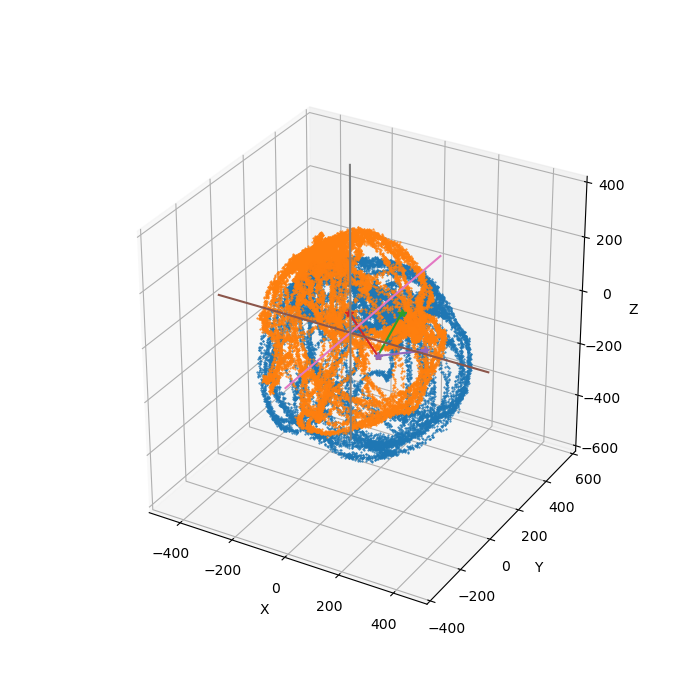

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#data00csv.txtの最後の３列がmG（ミリガウス）単位の地磁気データx、y、zとなっている
data=np.loadtxt('data00csv.txt', delimiter=',')

#地磁気データ抽出
magx=-data[:,6]
magy=data[:,7]
magz=-data[:,8]

#最小二乗法
#正規方程式の作成
#1 x2
_x4=sum(magx**4)
_x2y2 =sum(magx**2*magy**2)
_x2z2 =sum(magx**2*magz**2)
_2x3y =sum(2*magx**3*magy)
_2x2yz=sum(2*magx**2*magy*magz)
_2x3z =sum(2*magx**3*magz)
_x3   =sum(magx**3)
_x2y  =sum(magx**2*magy)
_x2z  =sum(magx**2*magz)
#2 y2
_y4   =sum(magy**4)
_y2z2 =sum(magy**2*magz**2)
_2xy3 =sum(2*magx*magy**3)
_2y3z=sum(2*magy**3*magz)
_2xy2z=sum(2*magx*magy**2*magz)
_xy2  =sum(magx*magy**2)
_y3   =sum(magy**3)
_y2z  =sum(magy**2*magz)
#3 z2
_z4   =sum(magz**4)
_2xyz2=sum(2*magx*magy*magz**2)
_2yz3=sum(2*magy*magz**3)
_2xz3 =sum(2*magx*magz**3)
_xz2  =sum(magx*magz**2)
_yz2  =sum(magy*magz**2)
_z3   =sum(magz**3)
#4 xy
_2x2y2=sum(2*magx**2*magy**2)
_2xy2z=sum(2*magx*magy**2*magz)
_2x2yz=sum(2*magx**2*magy*magz)
_x2y  =sum(magx**2*magy)
_xy2  =sum(magx*magy**2)
_xyz  =sum(magx*magy*magz)
#5 yz
_2y2z2=sum(2*magy**2*magz**2)
_2xyz2=sum(2*magx*magy*magz**2)
_xyz  =sum(magx*magy*magz)
_y2z  =sum(magy**2*magz)
_yz2  =sum(magy*magz**2)
#6 xz
_2x2z2=sum(2*magx**2*magz**2)
_x2z  =sum(magx**2*magz)
_xyz  =sum(magx*magy*magz)
_xz2  =sum(magx*magz**2)
#7 x
_x2   =sum(magx**2)
_xy   =sum(magx*magy)
_xz   =sum(magx*magz)
#8 y
_y2   =sum(magy**2)
_yz   =sum(magy*magz)
#9 z
_z2   =sum(magz**2)
#b
_x=sum(magx)
_y=sum(magy)
_z=sum(magz)

#正規行列
M=np.matrix([[     _x4,    _x2y2,    _x2z2,    _2x3y,   _2x2yz,  _2x3z,  _x3, _x2y, _x2z],
             [   _x2y2,      _y4,    _y2z2,    _2xy3,    _2y3z, _2xy2z, _xy2,  _y3, _y2z],
             [   _x2z2,    _y2z2,      _z4,   _2xyz2,    _2yz3,  _2xz3, _xz2, _yz2,  _z3],
             [ _2x3y/2,  _2xy3/2, _2xyz2/2,   _2x2y2,   _2xy2z, _2x2yz, _x2y, _xy2, _xyz],
             [_2x2yz/2,  _2y3z/2,  _2yz3/2, _2xy2z/2,   _2y2z2, _2xyz2, _xyz, _y2z, _yz2],
             [ _2x3z/2, _2xy2z/2,  _2xz3/2, _2x2yz/2, _2xyz2/2, _2x2z2, _x2z, _xyz, _xz2],
             [     _x3,     _xy2,     _xz2,     _x2y,     _xyz,   _x2z,  _x2,  _xy,  _xz],
             [    _x2y,      _y3,     _yz2,     _xy2,     _y2z,   _xyz,  _xy,  _y2,  _yz],
             [    _x2z,     _y2z,      _z3,     _xyz,     _yz2,   _xz2,  _xz,  _yz,  _z2]
            ])

b=np.matrix([_x2, _y2, _z2, _xy, _yz, _xz, _x, _y, _z]).T

#楕円体パラメータの算出
x=np.linalg.inv(M)*(-b)

print('楕円体パラメータ')
print(x)

a11=x[0,0]
a22=x[1,0]
a33=x[2,0]
a12=x[3,0]
a23=x[4,0]
a13=x[5,0]
b1 =x[6,0]
b2 =x[7,0]
b3 =x[8,0]

#楕円体2次項パラメータ行列
A=np.matrix([[a11,a12,a13],[a12,a22,a23],[a13,a23,a33]])

#2次項パラメータ行列の固有値と固有ベクトルを求める
lbda,v=np.linalg.eig(A)

print('固有値・固有ベクトル')
print(lbda)
print(v)

#回転・並行移動
#固有値と基底ベクトル（固有ベクトル）の並べ替え
vt=v.T
vx=vt[1].T
vy=vt[2].T
vz=vt[0].T
lbdx=lbda[1]
lbdy=lbda[2]
lbdz=lbda[0]

#1次項のパラメータベクトル
B=np.matrix([b1,b2,b3])

#対角化行列(回転行列)
P=np.hstack([vx,vy,vz])
print('回転行列')
print(P.T)

#楕円体の中心座標算出
x0=(-B*vx/2/lbdx)[0,0]
y0=(-B*vy/2/lbdy)[0,0]
z0=(-B*vz/2/lbdz)[0,0]

print('中心座標')
print(x0,y0,z0)

#球に変換
W=(B*vx)[0,0]**2/4/lbdx + (B*vy)[0,0]**2/4/lbdy + (B*vz)[0,0]**2/4/lbdz -1 
print('W')
print(W)

sx=np.sqrt(lbdx/W)
sy=np.sqrt(lbdy/W)
sz=np.sqrt(lbdz/W)
smax=max(sx,sy,sz)
sx=sx/smax
sy=sy/smax
sz=sz/smax

print('拡大係数')
print(sx, sy, sz)


#移動計算のためデータ整形
mag2=np.vstack([magx,magy,magz])

#回転
mag2=P.T*mag2

#並行移動
magx2=np.array(mag2)[0]-x0
magy2=np.array(mag2)[1]-y0
magz2=np.array(mag2)[2]-z0

#拡大縮小
magx2=sx*magx2
magy2=sy*magy2
magz2=sz*magz2


#データのプロット
# グラフの枠を作成
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

# X,Y,Z軸にラベルを設定
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim([-500,500])
ax.set_ylim([-400,600])
ax.set_zlim([-600,400])
ax.set_box_aspect((1,1,1))

# 生データ描画
ax.plot(magx,magy,magz,marker=".",ms=1, linestyle='None')

#回転・平行移動後の描画
ax.plot(magx2,magy2,magz2,marker=".",ms=1, linestyle='None')

#規定ベクトルの描画
ax.plot([0+x0,v[0,0]*200+x0],[0+y0,v[1,0]*200+y0],[0+z0,v[2,0]*200+z0], marker='*')
ax.plot([0+x0,v[0,1]*200+x0],[0+y0,v[1,1]*200+y0],[0+z0,v[2,1]*200+z0], marker='*')
ax.plot([0+x0,v[0,2]*200+x0],[0+y0,v[1,2]*200+y0],[0+z0,v[2,2]*200+z0], marker='*')

#xyz軸描画
ax.plot([-500,500],[0,0],[0,0])
ax.plot([0,0],[-400,600],[0,0])
ax.plot([0,0],[0,0],[-400,600])

# グラフ表示
plt.show()